<a href="https://colab.research.google.com/github/doloresgarro/Deep-Learning/blob/main/Pr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 2**

 *a) Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima cantidad de iteraciones MAX_ITE=300.*

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

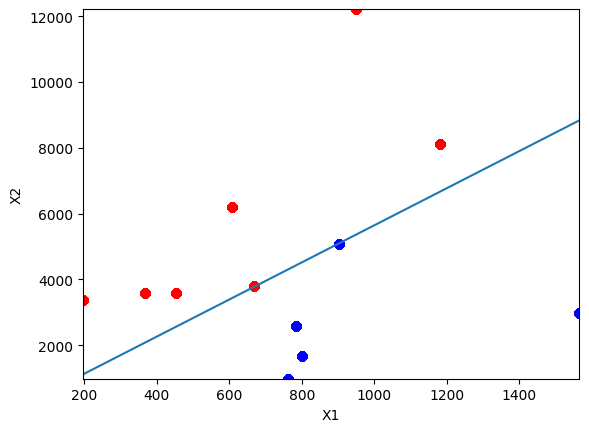

Numero de aciertos: 12.00
% Cantidad de aciertos: 100.00 %


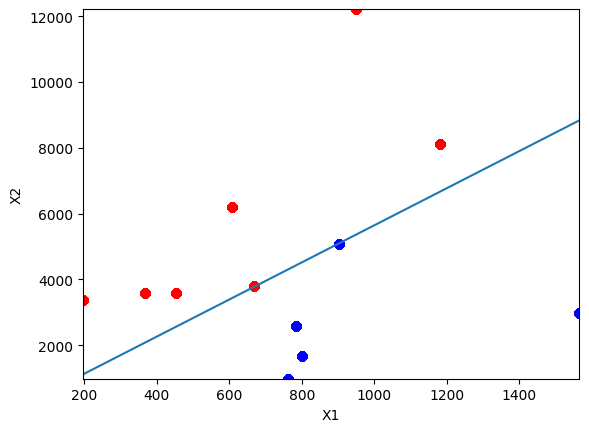

In [27]:
# leer hojas.csv
datos = pd.read_csv("hojas.csv")
nColum = list(datos.columns.values)
print (datos)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2]) # --> entrada (toma primeras dos columnas)

#--- SALIDA BINARIA ---
T = datos ['Clase'] == 'Hoja' # Hoja = 1, Helecho = 0
T = np.array(T * 1) # convierte a binario

alfa = 0.01  # velocidad de aprendizaje
MAX_ITE = 300
dibuja = 0
titulos = nColum[0:2] # --> 3 columnas

# se instancia el objeto con los parametros indicados
ppn = Perceptron(alfa, MAX_ITE, dibuja, titulos)
ppn.fit(X,T) # --> entrena al perceptrón

# ppn.predict(X) --> devuelve un array con la cantidad de aciertos
Y = ppn.predict(X)
nAciertos = sum(Y == T)
print("Numero de aciertos: %.2f" % nAciertos)
print("%% Cantidad de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))


*b) A partir de los pesos del perceptrón entrenado, indique cuál es la función discriminante obtenida.*

El resultado es una función discriminante lineal que separa los datos de entrada en dos clases
 - w_ : arreglo de M elementos siendo M la cantidad de atributos de entrada
 - b_ : valor numérico continuo correspondiente al bias.
 - errors_: errores cometidos en cada iteración


In [30]:
print ("Arreglo de atributos de entrada: ")
print(ppn.w_)
print("Bias: ")
print(ppn.b_)

Arreglo de atributos de entrada: 
[-738.78307595  130.88518937]
Bias: 
-0.30723662392835627


**Función discriminante:**

*-738.78307595 * perímetro + 130.88518937 * área - 0.30723662392835627*